### 1. (25 pontos) Realize 100-fold cross validation estratificado na base Skin Segmentation utilizando o classi cador 1-NN com distância Euclidiana então realize os procedimentos abaixo. 

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from scipy import stats

In [5]:
nomes_col = ['B', 'G', 'R', 'Class']

df = pd.read_csv("Skin_NonSkin.csv")

x = np.array(df[df.columns[0:3:]])
y = np.array(df[df.columns[-1::]]).flatten()

skf = StratifiedKFold(n_splits = 100)

classificador = KNeighborsClassifier(n_neighbors=1)

array_taxas = []
array_medidasf = []

for train_index, test_index in skf.split(x,y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    classificador.fit(x_train, y_train)
    taxas = classificador.score(x_test, y_test)
    array_taxas.append(taxas)
    y_pred = classificador.predict(x_test)
    recall = recall_score(y_test, y_pred)
    precisao = precision_score(y_test, y_pred)
    array_medidasf.append((2*precisao*recall)/(precisao+recall))



### (a) Mostre a média, o máximo e o mínimo da medida-F. 

In [67]:
def calc_f_measure(classifier):
    list_rates = []
    list_f_measure = []

    for train_index, test_index in skf.split(x,y):
        # TREINO
        x_train = x[train_index]
        y_train = y[train_index]
        # TESTE
        x_test = x[test_index]
        y_test = y[test_index]

        classifier.fit(x_train, y_train)
        rate = classifier.score(x_test, y_test)
        list_rates.append(rate)

        y_pred = classifier.predict(x_test)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)

        f_measure = ((2*precision*recall)/(precision+recall))
        list_f_measure.append(f_measure)

    average_fMeasure = np.mean(list_f_measure)
    min_fMeasure = min(list_f_measure)
    max_fMeasure = max(list_f_measure)

    print("\n MÉDIA: \n")
    print("%.3f" % average_fMeasure)
    print("\n MÁXIMO: \n")
    print("%.3f" % max_fMeasure)
    print("\n MÍNIMO: \n")
    print("%.3f" % min_fMeasure)

    return list_f_measure, average_fMeasure

In [68]:
list_f_measure, average_fMeasure = calc_f_measure(classifier)


NameError: name 'classifier' is not defined

### (b) Mostre o histograma da medida-F.

In [ ]:
def histogram_f_measure(list_f_measure):
    n_bins = len(list_f_measure)
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    axs[0].hist(list_f_measure, bins=n_bins)

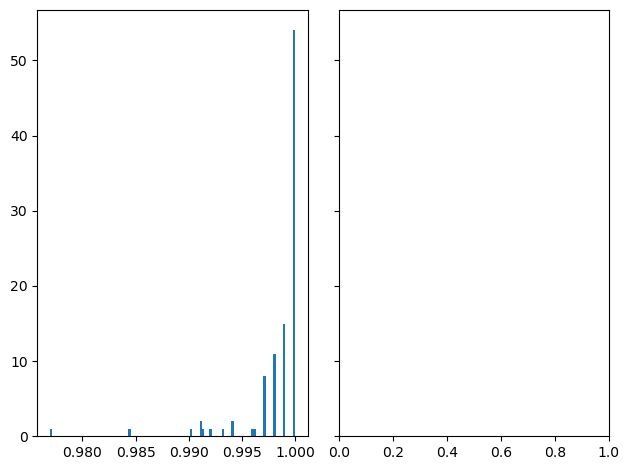

In [ ]:
histogram_f_measure(list_f_measure)

### (c) Calcule o intervalo de confiança da medida-F.

In [ ]:
def calc_confidence_interval(average_fMeasure, list_f_measure):
    desvio_padrao = np.std(list_f_measure)
    
    erro_padrao = desvio_padrao/np.sqrt(len(list_f_measure))

    multiplier = abs(stats.distributions.norm.ppf(0.025))

    confidence_interval = (average_fMeasure - multiplier*erro_padrao, average_fMeasure + multiplier*erro_padrao)
    print("\n INTERVALO DE CONFIANÇA \n")
    print(confidence_interval)

    return confidence_interval

In [ ]:
confidence_interval = calc_confidence_interval(average_fMeasure, list_f_measure)


 INTERVALO DE CONFIANÇA 

(0.997643082377952, 0.9989729820531587)


### (d) Qual a medida-F mínima que você espera ao aplicar este classificador, sob as mesmas condições de treinamento, para dados nunca vistos?

O valor minimo do intervalo de confiança: 0.997643082377952

### (e) Qual a medida-F esperada para o classificador quando aplicada a dados nunca antes vistos. 


Valores dentro do intervalo de confiança: (0.997643082377952, 0.9989729820531587)

### 2. (25 pontos) Realize um experimento pareado com 100 repetições de Holdout 50/50 utilizando o classi cador 1-NN com distância Euclidiana. Utilize duas versões da base Wine archive. ics.uci.edu/ml/datasets/Wine para este experimento, a primeira versão é a base original, a segunda versão é a base sem a última coluna. Após calcular 100 taxas de acero para cada uma das versões da base, realize os procedimentos abaixo. 


In [ ]:
names_columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df = pd.read_csv("wine.data", names=names_columns)

y = np.array(df[df.columns[:1:]]).flatten()
y2 = df[df.columns[:1:]]



In [ ]:
def calc_rating_n_columns(dataframe, n_columns, n_rates, porcent_test):
    list = []
    column = len(dataframe.columns)

    classificador = KNeighborsClassifier(n_neighbors=1)

    for n in range(n_columns):
        list_rates = []
        x = (dataframe[dataframe.columns[1:column:]])
        column -= 1
        
        for i in range(n_rates):
            x_treino, x_teste, y_treino, y_teste = train_test_split (x, y,test_size=porcent_test, random_state=i)
            classificador.fit(x_treino, y_treino)
            rates = classificador.score(x_teste, y_teste)
            list_rates.append(rates)

        list.append(list_rates)

    return list

lists_rates = calc_rating_n_columns(df, 2, 100, 0.5)



In [ ]:
for k in range(len(lists_rates)):
    print(k, lists_rates[k], '\n')

0 [0.7415730337078652, 0.6966292134831461, 0.7191011235955056, 0.7191011235955056, 0.8202247191011236, 0.6853932584269663, 0.7640449438202247, 0.6629213483146067, 0.7415730337078652, 0.6741573033707865, 0.7303370786516854, 0.7752808988764045, 0.7752808988764045, 0.7415730337078652, 0.797752808988764, 0.7191011235955056, 0.7078651685393258, 0.7078651685393258, 0.6741573033707865, 0.6404494382022472, 0.6966292134831461, 0.7752808988764045, 0.7191011235955056, 0.7640449438202247, 0.8089887640449438, 0.7191011235955056, 0.7415730337078652, 0.7415730337078652, 0.7303370786516854, 0.5955056179775281, 0.6179775280898876, 0.7528089887640449, 0.7303370786516854, 0.651685393258427, 0.8202247191011236, 0.7078651685393258, 0.7640449438202247, 0.6853932584269663, 0.7415730337078652, 0.7640449438202247, 0.7303370786516854, 0.6853932584269663, 0.6853932584269663, 0.7865168539325843, 0.7191011235955056, 0.6741573033707865, 0.7303370786516854, 0.7303370786516854, 0.651685393258427, 0.6853932584269663, 

In [ ]:
def calc_differences(lists_rates):
    total_differences = {}
    current_differences = []
    local_differences = []

    for x in range(len(lists_rates)-1):
        for y in range(len(lists_rates)-1):
            for z in range(len(lists_rates[y])):
                if y >= x:
                    # 0 lists_rates[0][0] - lists_rates[1][0]
                    # 1 lists_rates[0][1] - lists_rates[1][1]
                    # 1 lists_rates[0][...] - lists_rates[1][...]
                    current_differences.append(lists_rates[x][z] - lists_rates[y+1][z])

            if current_differences not in local_differences:
                if current_differences:
                    local_differences.append(current_differences)

            current_differences = []
            
        total_differences[x+1] = local_differences
        local_differences = []
    
    return total_differences

total_differences = calc_differences(lists_rates)


In [ ]:
print(total_differences)

{1: [[-0.1348314606741573, -0.1685393258426966, -0.1123595505617978, -0.1123595505617978, -0.0561797752808989, -0.2359550561797753, -0.0898876404494382, -0.1910112359550562, -0.05617977528089879, -0.1235955056179775, -0.0674157303370786, -0.0337078651685393, -0.1235955056179775, -0.1348314606741573, -0.101123595505618, -0.0786516853932584, -0.1573033707865169, -0.0898876404494382, -0.1685393258426966, -0.1235955056179775, -0.1573033707865168, -0.0898876404494382, -0.1123595505617978, -0.1460674157303371, -0.101123595505618, -0.022471910112359605, -0.05617977528089879, -0.0898876404494382, -0.1235955056179775, -0.2584269662921348, -0.1797752808988764, -0.0449438202247191, -0.101123595505618, -0.2696629213483146, 0.011235955056179803, -0.0898876404494382, -0.0786516853932584, -0.1123595505617977, -0.1235955056179775, -0.0337078651685393, -0.1573033707865168, -0.1235955056179775, -0.101123595505618, -0.0786516853932584, -0.0561797752808989, -0.1910112359550562, -0.0898876404494382, -0.067

In [ ]:
def calc_all_averages(total_differences):
    total_average = {}
    current_average = []
    value_total = 0

    for i in range(len(total_differences)):
        for j in range(len(total_differences[i+1])):
            for k in total_differences[i+1][j]:
                value_total += k
            average = value_total / len(total_differences[i+1][j])
            current_average.append(average)
            value_total = 0
        total_average[i+1] = current_average
        current_average = []
    
    return total_average

total_average = calc_all_averages(total_differences)

In [ ]:
print(total_average)

{1: [-0.11505617977528089]}


In [ ]:
def calc_confidence_interval(total_average, total_differences):
    for i in range(len(total_average)):
        for x in range(len(total_average[i+1])):
            
            standard_deviation = np.std(total_differences[i+1][x])
            standard_error = standard_deviation/np.sqrt(len(total_differences[i+1][x]))
            multi = abs(stats.distributions.norm.ppf(0.025))

            print(i+1, (total_average[i+1][x] - multi*standard_error, total_average[i+1][x] + multi*standard_error))

confidence_interval = calc_confidence_interval(total_average, total_differences)

1 (-0.1257323180768185, -0.10438004147374327)


In [ ]:
def calc_separate_averages(lists_rates):

    exit = {}
    aux = []
    
    for x in range(len(lists_rates)): 
        # calcula a media de um numpy rray 
        aux.append(np.mean(lists_rates[x]))          
        exit[x+1] = aux
        aux = []
    return exit

separate_averages = calc_separate_averages(lists_rates)

In [ ]:
hash_rates = {}
aux = []
for x in range(len(lists_rates)):
    aux.append(lists_rates[x])
    hash_rates[x+1] = aux
    aux = []

calc_confidence_interval(separate_averages, hash_rates)

3. (25 pontos) Qual o número máximo de características que podem ser removidas da base Iris archive.ics.uci.edu/ml/datasets/iris sem reduzir significativamente a taxa de acerto? De na a metodologia utilizada para justificar sua resposta. 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier

In [70]:
names_columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class' ]
df = pd.read_csv("iris.data", names=names_columns)

y = np.array(df[df.columns[-1::]]).flatten()

h = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}

y2 = df[df.columns[-1::]]

for classe in range(len(y)):
    y[classe] = int(h[y[classe]])

y = y.astype(np.int64)

In [84]:
def calc_rating_n_columns(df, n_columns, n_rates, porcent_test):
    lists = []
    colunas = len(df.columns)-1
    classificador = KNeighborsClassifier(n_neighbors=1)

    for n in range(n_columns):
        list_rates = []
        x = (df[df.columns[0:colunas:]])
        colunas -= 1
        for i in range(n_rates):
            x_treino, x_teste, y_treino, y_teste = train_test_split (x, y,test_size=porcent_test, random_state=i)
            classificador.fit(x_treino, y_treino)
            taxas = classificador.score(x_teste, y_teste)
            list_rates.append(taxas)

        lists.append(list_rates)

    return lists

qtd_columns = len(df.columns)-1
lists_rates = calc_rating_n_columns(df, qtd_columns, 30, 0.5)

In [85]:
def calc_confidence_interval(total_average, total_differences):
    for i in range(len(total_average)):
        for x in range(len(total_average[i+1])):
            
            standard_deviation = np.std(total_differences[i+1][x])
            standard_error = standard_deviation/np.sqrt(len(total_differences[i+1][x]))
            multi = abs(stats.distributions.norm.ppf(0.025))

            print(i+1, (total_average[i+1][x] - multi*standard_error, total_average[i+1][x] + multi*standard_error))

confidence_interval = calc_confidence_interval(total_average, total_differences)

1 (-0.1257323180768185, -0.10438004147374327)


In [86]:
def calc_separate_averages(lists_rates):

    exit = {}
    aux = []
    
    for x in range(len(lists_rates)): 
        # calcula a media de um numpy rray 
        aux.append(np.mean(lists_rates[x]))          
        exit[x+1] = aux
        aux = []
    return exit

separate_averages = calc_separate_averages(lists_rates)

In [87]:
hash_rates = {}
aux = []
for x in range(len(lists_rates)):
    aux.append(lists_rates[x])
    hash_rates[x+1] = aux
    aux = []

calc_confidence_interval(separate_averages, hash_rates)

1 (0.9392543625860171, 0.9514123040806496)
2 (0.917420609527016, 0.937690501584095)
3 (0.6997671170240668, 0.7286773274203776)
4 (0.5832407909731356, 0.6238703201379756)


4. (25 pontos) Utilizando o classificador k-NN na base Wine archive.ics.uci.edu/ml/datasets/ Wine, teste os valores k = 1, . . . , 15. Para qual valor de k o classi cador apresenta uma taxa de acerto significativamente maior? De na a metodologia utilizada para justificar sua resposta. 

In [ ]:
nomes_col = ['Class', 'Alcohol', 'Malic acid','Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols','Proanthocyanins', 'Color intensity','Hue','OD280/OD315 of diluted wines','Proline',]

df = pd.read_csv("data/wine.data", names=nomes_col)

In [ ]:
x = np.array(df[df.columns[1:13:]])
x2 = df[df.columns[1:13:]]

y = np.array(df[df.columns[:1:]]).flatten()
y2 = df[df.columns[:1:]]

In [ ]:
def calcular_taxas_para_knn(k, qtd_taxas, porcent_test):
    array_taxas = []

    for n in range(k):
        arrays = []
        for i in range(qtd_taxas):
            x_treino, x_teste, y_treino, y_teste = train_test_split (x, y,test_size=porcent_test, random_state=i)
            classificador = KNeighborsClassifier(n_neighbors=n+1)
            classificador.fit(x_treino, y_treino)
            taxas = classificador.score(x_teste, y_teste)
            arrays.append(taxas)

        array_taxas.append(arrays)
        
    return array_taxas

array_taxas = calcular_taxas_para_knn(15, 30, 0.5)

In [ ]:
def calcular_intervalo_confianca(hash_medias, total_differences):
    for i in range(len(hash_medias)):
        for x in range(len(hash_medias[i+1])):
            
            std = np.std(total_differences[i+1][x])

            desvio_padrao = std/np.sqrt(len(total_differences[i+1][x]))

            multiplicador = abs(stats.distributions.norm.ppf(0.025))

            print("int_conf: ", i+1,(hash_medias[i+1][x] - multiplicador*desvio_padrao, hash_medias[i+1][x] + multiplicador*desvio_padrao)
            )

In [ ]:
def calcular_medias_separadas(array):

    hash_saida = {}
    array_aux = []
    for x in range(len(array)):  
        array_aux.append(np.mean(array[x]))          
        hash_saida[x+1] = array_aux
        array_aux = []
    return hash_saida


In [ ]:
medias_separadas = calcular_medias_separadas(array_taxas)

hash_taxas = {}
array_aux = []

for x in range(len(array_taxas)):
    array_aux.append(array_taxas[x])
    hash_taxas[x+1] = array_aux
    array_aux = [] 

calcular_intervalo_confianca(medias_separadas, hash_taxas)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
colnames = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", 
            "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", 
            "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
dataset = pd.read_csv(url, names=colnames)

X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

list_score = []
for k in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    score = accuracy_score(y_test, y_pred)
    print(k, "Taxa de acerto: ", score)
    list_score.append(score)

score.sort
print("\n")
print("Maior taxa de acerto: ", score)

1 Taxa de acerto:  0.6944444444444444
2 Taxa de acerto:  0.7222222222222222
3 Taxa de acerto:  0.6111111111111112
4 Taxa de acerto:  0.6944444444444444
5 Taxa de acerto:  0.6388888888888888
6 Taxa de acerto:  0.6111111111111112
7 Taxa de acerto:  0.6388888888888888
8 Taxa de acerto:  0.6388888888888888
9 Taxa de acerto:  0.6666666666666666
10 Taxa de acerto:  0.6111111111111112
11 Taxa de acerto:  0.6111111111111112
12 Taxa de acerto:  0.6111111111111112
13 Taxa de acerto:  0.5833333333333334
14 Taxa de acerto:  0.5833333333333334
15 Taxa de acerto:  0.5833333333333334


Maior taxa de acerto:  0.5833333333333334
